In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
datos = pd.read_csv("practica1 - experimento.csv")

In [7]:
print(datos)

     tiempos  posiciones  incertidumbres
0   0.000000    0.000000        0.000000
1   0.148387    0.246875        0.699224
2   0.296774    1.751473        1.639011
3   0.445161    2.182324        2.555548
4   0.593548    5.517421        3.524032
5   0.741935    7.507906        1.447654
6   0.890323   11.445106        4.928580
7   1.038710   15.256564        4.195918
8   1.187097   17.242846        0.591961
9   1.335484   19.843210        3.308066
10  1.483871   27.247292        7.601517
11  1.632258   31.865696        2.592837
12  1.780645   35.296376        8.089847
13  1.929032   39.539136        5.886652
14  2.077419   50.997270        6.322718
15  2.225806   56.696409        2.584388
16  2.374194   64.618763       11.861020
17  2.522581   63.786489        8.835949
18  2.670968   70.444176        9.069735
19  2.819355   81.459747       13.317948
20  2.967742  100.095988       15.643106
21  3.116129   96.359424       18.191824
22  3.264516  107.266548        8.639395
23  3.412903  11

In [9]:
datos.loc[2]

tiempos           0.296774
posiciones        1.751473
incertidumbres    1.639011
Name: 2, dtype: float64

In [10]:
datos.loc[2,"tiempos"]

0.2967741935

In [12]:
datos["posiciones"]

0       0.000000
1       0.246875
2       1.751473
3       2.182324
4       5.517421
5       7.507906
6      11.445106
7      15.256564
8      17.242846
9      19.843210
10     27.247292
11     31.865696
12     35.296376
13     39.539136
14     50.997270
15     56.696409
16     64.618763
17     63.786489
18     70.444176
19     81.459747
20    100.095988
21     96.359424
22    107.266548
23    116.268387
24    131.427724
25    153.570597
26    151.727427
27    175.721933
28    170.723633
29    200.715098
30    215.648736
31    213.567271
Name: posiciones, dtype: float64

In [14]:
datos["incertidumbres"]

0      0.000000
1      0.699224
2      1.639011
3      2.555548
4      3.524032
5      1.447654
6      4.928580
7      4.195918
8      0.591961
9      3.308066
10     7.601517
11     2.592837
12     8.089847
13     5.886652
14     6.322718
15     2.584388
16    11.861020
17     8.835949
18     9.069735
19    13.317948
20    15.643106
21    18.191824
22     8.639395
23     5.042728
24     9.937303
25    14.749017
26    21.833470
27    10.042457
28     4.928771
29    18.081833
30    10.894022
31    14.036686
Name: incertidumbres, dtype: float64

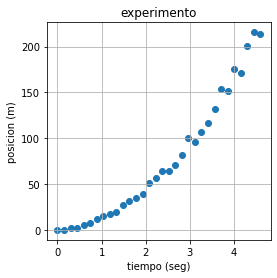

In [20]:
fig = plt.figure(figsize=(4,4))
plt.scatter(datos["tiempos"],datos["posiciones"])
plt.xlabel("tiempo (seg)")
plt.ylabel("posicion (m)")
plt.title("experimento")
plt.grid()
plt.show()

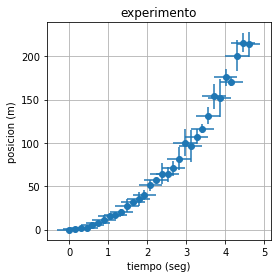

In [26]:
fig = plt.figure(figsize=(4,4))
plt.errorbar(datos["tiempos"],datos["posiciones"],yerr=datos["incertidumbres"],xerr=0.3,fmt="o")
plt.xlabel("tiempo (seg)")
plt.ylabel("posicion (m)")
plt.title("experimento")
plt.grid()
plt.savefig("experimento1.pdf")
plt.show()

## Regresión

In [29]:
coef = np.polyfit(datos["tiempos"],datos["posiciones"],1)

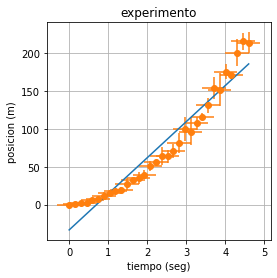

In [31]:
m = coef[0]
b = coef[1]
ajuste = [m*t + b for t in datos["tiempos"]]
fig = plt.figure(figsize=(4,4))
# grafico el ajuste
plt.plot(datos["tiempos"],ajuste)
# grafico los datos experimentales
plt.errorbar(datos["tiempos"],datos["posiciones"],yerr=datos["incertidumbres"],xerr=0.3,fmt="o")
# detalles de la grafica
plt.xlabel("tiempo (seg)")
plt.ylabel("posicion (m)")
plt.title("experimento")
plt.grid()
plt.show()

In [35]:
rcuadrado = np.corrcoef(datos["posiciones"] ,ajuste)[0][1]

In [36]:
rcuadrado

0.9650054946563594

## Como mejoramos el ajuste?

### Opción 1: ajustar un polinomio de grado más grande

Ya intentamos

$$ posiciones \sim b + m \cdot tiempos$$

Podemos intentar un polinomio cuadrático

$$ posiciones \sim a_0 + a_1 \cdot tiempos + a_2 \cdot tiempo^2$$

In [38]:
coef = np.polyfit(datos["tiempos"],datos["posiciones"],2)
coef

array([10.19904316,  0.75182872,  1.29944726])

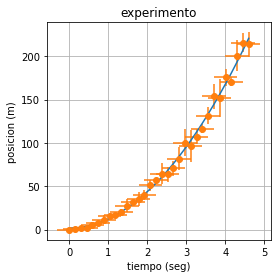

In [41]:
a2 = coef[0]
a1 = coef[1]
a0 = coef[2]
ajuste = [a2*(t**2) + a1*t  + a0 for t in datos["tiempos"]]
fig = plt.figure(figsize=(4,4))
# grafico el ajuste
plt.plot(datos["tiempos"],ajuste)
# grafico los datos experimentales
plt.errorbar(datos["tiempos"],datos["posiciones"],yerr=datos["incertidumbres"],xerr=0.3,fmt="o")
# detalles de la grafica
plt.xlabel("tiempo (seg)")
plt.ylabel("posicion (m)")
plt.title("experimento")
plt.grid()
plt.show()

In [43]:
rcuadrado = np.corrcoef(datos["posiciones"],ajuste)[0][1]
rcuadrado

0.9975305874905601

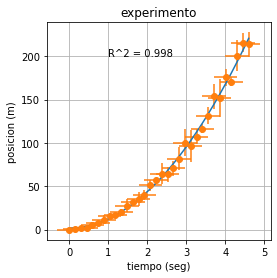

In [47]:
a2 = coef[0]
a1 = coef[1]
a0 = coef[2]
ajuste = [a2*(t**2) + a1*t  + a0 for t in datos["tiempos"]]
fig = plt.figure(figsize=(4,4))
# grafico el ajuste
plt.plot(datos["tiempos"],ajuste)
# grafico los datos experimentales
plt.errorbar(datos["tiempos"],datos["posiciones"],yerr=datos["incertidumbres"],xerr=0.3,fmt="o")
plt.text(1,200,"R^2 = {0}".format(round(rcuadrado,3)))
# detalles de la grafica
plt.xlabel("tiempo (seg)")
plt.ylabel("posicion (m)")
plt.title("experimento")
plt.grid()
plt.show()

### Opción 2: hacer ajuste lineal para $tiempos^2$

$$posiciones \sim b + m \cdot tiempos^2$$

In [48]:
nuevosTiempos = [t**2 for t in datos["tiempos"]]

In [53]:
datos["tiempo^2"] = [t**2 for t in datos["tiempos"]]
datos

tiempos  posiciones  incertidumbres   tiempo^2
0   0.000000    0.000000        0.000000   0.000000
1   0.148387    0.246875        0.699224   0.022019
2   0.296774    1.751473        1.639011   0.088075
3   0.445161    2.182324        2.555548   0.198169
4   0.593548    5.517421        3.524032   0.352300
5   0.741935    7.507906        1.447654   0.550468
6   0.890323   11.445106        4.928580   0.792674
7   1.038710   15.256564        4.195918   1.078918
8   1.187097   17.242846        0.591961   1.409199
9   1.335484   19.843210        3.308066   1.783517
10  1.483871   27.247292        7.601517   2.201873
11  1.632258   31.865696        2.592837   2.664266
12  1.780645   35.296376        8.089847   3.170697
13  1.929032   39.539136        5.886652   3.721165
14  2.077419   50.997270        6.322718   4.315671
15  2.225806   56.696409        2.584388   4.954214
16  2.374194   64.618763       11.861020   5.636795
17  2.522581   63.786489        8.835949   6.363413
18  2.670968   70.444176        9.069735   7.134069
19  2.819355   81.459747       13.317948   7.948762
20  2.967742  100.095988       15.643106   8.807492
21  3.116129   96.359424       18.191824   9.710260
22  3.264516  107.266548        8.639395  10.657066
23  3.412903  116.268387        5.042728  11.647908
24  3.561290  131.427724        9.937303  12.682789
25  3.709677  153.570597       14.749017  13.761707
26  3.858065  151.727427       21.833470  14.884662
27  4.006452  175.721933       10.042457  16.051655
28  4.154839  170.723633        4.928771  17.262685
29  4.303226  200.715098       18.081833  18.517752
30  4.451613  215.648736       10.894022  19.816857
31  4.600000  213.567271       14.036686  21.160000

In [55]:
coef = np.polyfit(datos["tiempo^2"],datos["posiciones"],1)
corr

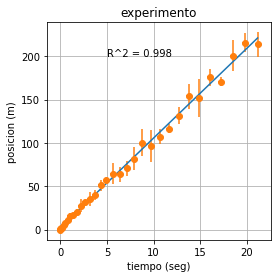

In [62]:
m = coef[0]
b = coef[1]
ajuste = [m*x + b for x in datos["tiempo^2"]]
rcuadrado = np.corrcoef(datos["posiciones"],ajuste)[0][1]
fig = plt.figure(figsize=(4,4))
# grafico el ajuste
plt.plot(datos["tiempo^2"],ajuste)
# grafico los datos experimentales
plt.errorbar(datos["tiempo^2"],datos["posiciones"],yerr=datos["incertidumbres"],xerr=0.3,fmt="o")
#poner correlacion
plt.text(5,200,"R^2 = {0}".format(round(rcuadrado,3)))
# detalles de la grafica
plt.xlabel("tiempo (seg)")
plt.ylabel("posicion (m)")
plt.title("experimento")
plt.grid()
plt.savefig("reporte.pdf")
plt.show()

In [60]:
rcuadrado

0.9975229139999575

In [64]:
datos.to_csv("datosCorregidos.csv")